<a href="https://colab.research.google.com/github/chohyungrae/Python-Study-/blob/master/Keras%EA%B8%B0%EC%B4%88_%EB%AA%A8%EB%8D%B8%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 임포트해서 사용하는 방법

In [37]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.4.1'

In [38]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [39]:
keras.layers.Dense(10, activation='sigmoid')

In [40]:
keras.Model()

In [41]:
keras.models.Sequential()

In [42]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [43]:
Dense(10, activation='relu')

In [44]:
Flatten(input_shape=[28,28])

In [45]:
x_train = np.random.randn(5500,2)
Input(shape=x_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_5')>

In [46]:
#객체할당(레이어선언)
dense = Dense(10, activation='relu', name = 'Dense Layer')
dense

In [47]:
dense2 = Dense(15, activation='softmax')
dense2

In [48]:
#Activation함수
dense = Dense(10, kernel_initializer='he_normal', name = 'Dense layer')
dense = Activation(dense)
dense

In [49]:
#Flatten 레이어
Flatten(input_shape = (28,28))


In [50]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [51]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [52]:
#모델의구조확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 28, 300)           8700      
_________________________________________________________________
dense_20 (Dense)             (None, 28, 100)           30100     
_________________________________________________________________
dense_21 (Dense)             (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


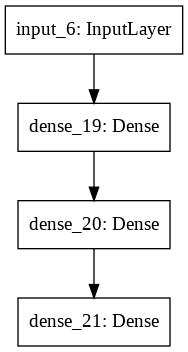

In [53]:
#그림으로 모델구조 설명
plot_model(model)

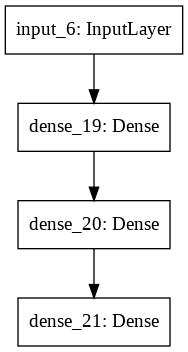

In [54]:
#저장
plot_model(model, to_file = 'model1.png')

In [55]:
!ls

model1.png  model3.png	model4.png  model.png  sample_data


In [56]:
#input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [57]:
inputs = Input(shape=(28,28,1))

x=Flatten(input_shape=(28,28,1))(inputs)
x=Dense(300, activation='relu')(x)
x=Dense(100, activation='relu')(x)
x=Dense(10, activation='softmax')(x)

In [58]:
model = Model(inputs=inputs, outputs=x)

In [59]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


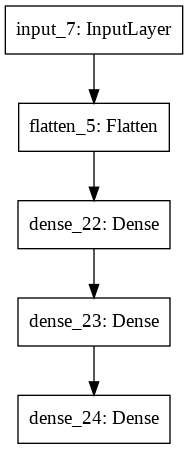

In [60]:
plot_model(model)

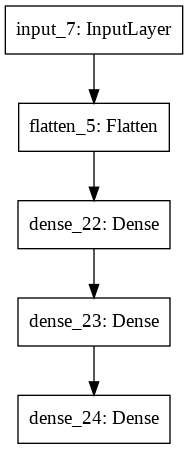

In [61]:
#저장
plot_model(model, to_file='model3.png')

In [62]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1=Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30,activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])



In [63]:
model.summary() #구성

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 28, 100)      2900        input_8[0][0]                    
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 28, 30)       3030        dense_25[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 28, 58)       0           input_8[0][0]                    
                                                                 dense_26[0][0]             

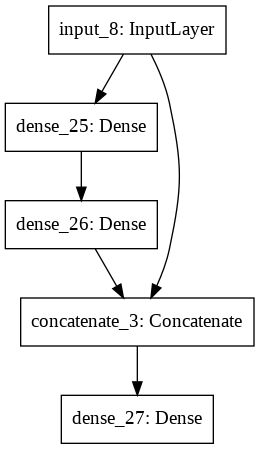

In [64]:
plot_model(model)

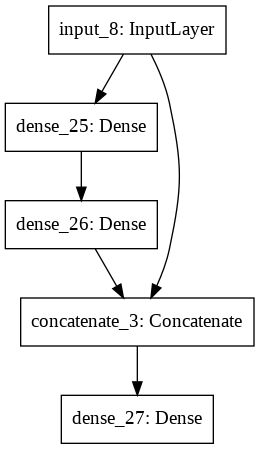

In [65]:
plot_model(model, to_file='model4.png') #저장

In [66]:
# 다중입력
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])



In [67]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 10, 10)       1010        dense_28[0][0]                   
____________________________________________________________________________________________

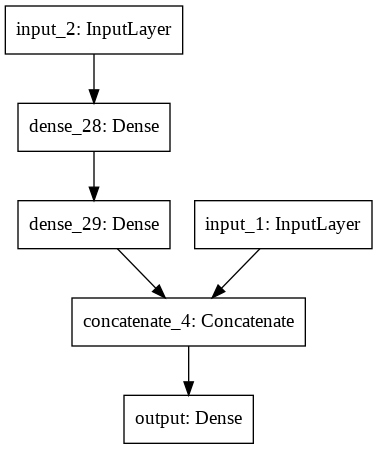

In [68]:
plot_model(model)

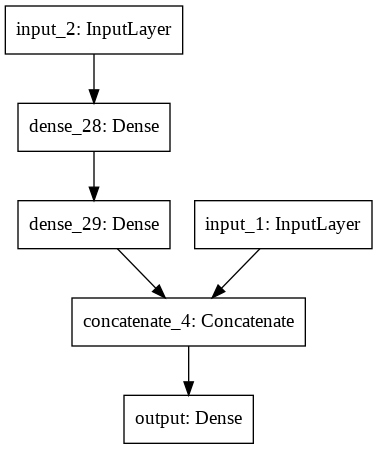

In [69]:
# 저장
plot_model(model, to_file='model5.png')

In [72]:
#다중출력
input_ = Input(shape=(10,10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [73]:
#확인
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 10, 10)       1010        dense_31[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_32[0][0]                   
____________________________________________________________________________________________

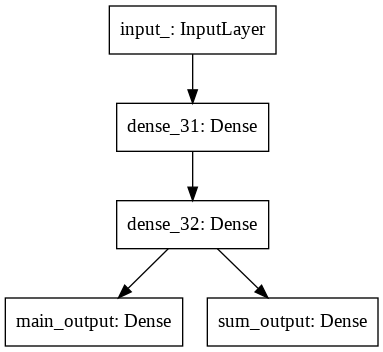

In [74]:
plot_model(model)

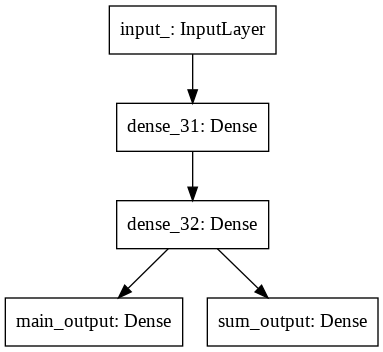

In [75]:
plot_model(model, to_file='model6.png')